In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
start_date = '2000-01-01'
end_date = '2018-01-01'

In [3]:
'''
import pandas_datareader as pdr

df_to_save = pdr.DataReader(name='AAPL', data_source='yahoo', start=start_date, end=end_date)
df_to_save.head(5)

df_to_save.to_csv('AAPL_YAHOO.csv')

'''

df = pd.read_csv('AAPL_YAHOO.csv', index_col='Date', parse_dates=True)

In [4]:
df.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,4.017857,3.631696,3.745536,3.997768,133949200.0,2.655498
2000-01-04,3.950893,3.613839,3.866071,3.660714,128094400.0,2.431611


___
___
___


## Return rate

Relative measure of investment profitability thus allows to compare different investments.

## $ R_t = \frac{(P_t-P_{t-k})}{P_{t-k}}$

In [5]:
def return_rate(open_price, close_price):
    ''' Returns tuple '''
    R = (close_price-open_price)/open_price
    ans = R * 100
    return (ans, 'outcome provided in %')

## Average return rate

## $ \bar{R} = \frac{\sum^n_{t=1} R_t}{n} $

### gdzie: 
- $n$ number of all time spans
- $R_t$ net return in time t

## Return rate standard deviation:

There is positive corretlation between std of return rate and investment risk

## $ S_r = \sqrt{\frac{\sum^n_{t=1}(R_t - \bar{R})^2}{n}} $

In [6]:
df_return_rate = df[['Open', 'Close']].copy()
df_return_rate['Index'] = np.arange(len(df_return_rate))
df_return_rate.head()

,Open,Close,Index
Date,,,
2000-01-03,3.745536,3.997768,0
2000-01-04,3.866071,3.660714,1
2000-01-05,3.705357,3.714286,2
2000-01-06,3.790179,3.392857,3
2000-01-07,3.446429,3.553571,4


In [7]:
def n_session_return(n, df):
    open_price = df['Open'].copy()
    close_price = df['Close'].copy()
    returns = []
    n = n-1
    
    for i in range(len(df)-n):
        return_t = (close_price[i+n] - open_price[i])/open_price[i]
        returns.append(return_t)
        
    return returns

In [8]:
# Initialize columns
df_return_rate['1-day Return'] = np.nan
df_return_rate['5-day Return'] = np.nan
df_return_rate['20-day Return'] = np.nan

# bear in mind that one session return inlude sell transaction during last session of period (that's why I subtract 1)
df_return_rate['1-day Return'].iloc[1-1:] = n_session_return(1, df_return_rate)
df_return_rate['5-day Return'].iloc[5-1:] = n_session_return(5, df_return_rate)
df_return_rate['20-day Return'].iloc[20-1:] = n_session_return(20, df_return_rate)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


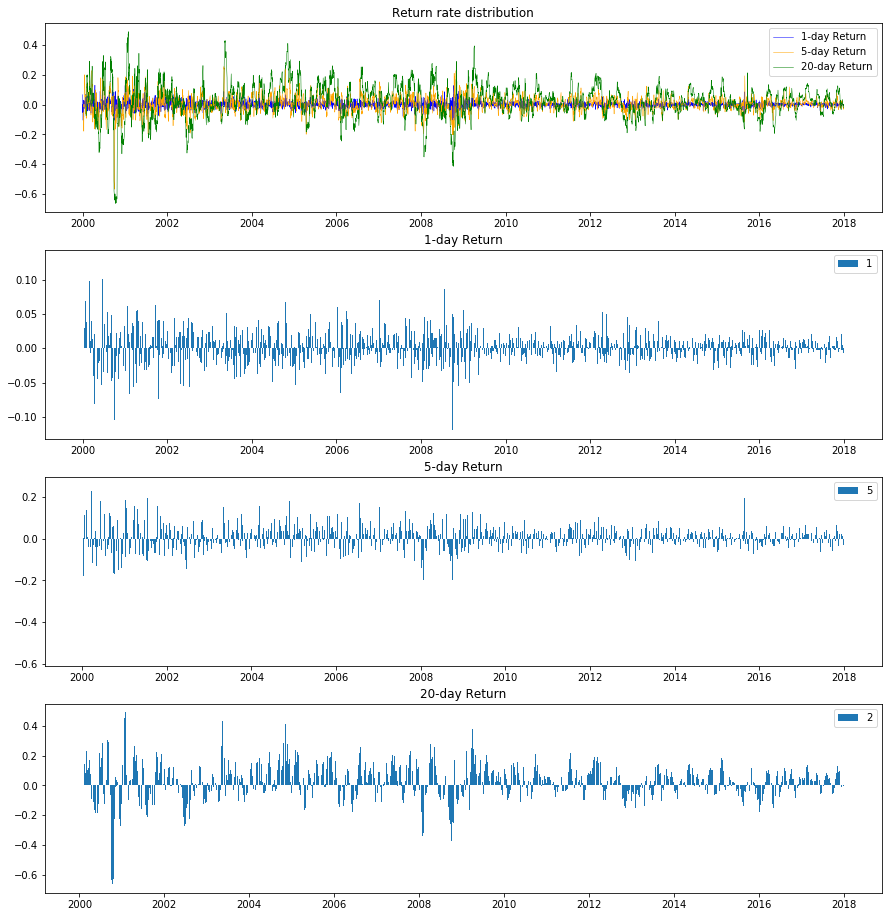

In [9]:
figure,  plots = plt.subplots(4, 1, figsize=(15, 16))

names = ['1-day Return', '5-day Return', '20-day Return']
colors = ['blue', 'orange', 'green']

for i in range(4):
    if i == 0:
        ax = plots[i]
        for idx, name in enumerate(names):
            ax.plot(df_return_rate[name],
                    lw=0.5, color=colors[idx])
        ax.set_title('Return rate distribution')
        ax.legend(names)    

    else:
        idx = i - 1
        ax = plots[i]
        ax.bar(df_return_rate[[names[idx]]].index, df_return_rate[[names[idx]]].values.squeeze(),
                lw=0.5, width=2)
        ax.set_title(names[idx])
        ax.legend(names[idx], loc=1)

In [10]:
from statistics import mode

df_net_return = pd.DataFrame(columns=['min',
                                      'min_idx',
                                      'max',
                                      'max_idx',
                                      'mean',
                                      'std',
                                      'median',
                                      'mode'])

names = ['1-day Return', '5-day Return', '20-day Return']

for name in names:
    mn = df_return_rate.min()[name]
    mn_idx = str(df_return_rate.idxmin()[name])[:10]
    
    mx = df_return_rate.max()[name]
    mx_idx = str(df_return_rate.idxmax()[name])[:10]
    
    numbers = df_return_rate[name].dropna()
    numbers = numbers.values * 100
    
    mean = np.mean(numbers)
    std = np.std(numbers)
    median = np.median(numbers)
    

    mod = mode(list(numbers))
    
    df_net_return.loc[name] = mn, mn_idx, mx, mx_idx, mean, std, median, mod

df_net_return

,min,min_idx,max,max_idx,mean,std,median,mode
1-day Return,-0.120047,2008-09-29,0.131278,2000-04-17,0.021202,2.151028,0.030196,0.0
5-day Return,-0.568841,2000-10-03,0.256281,2003-05-06,0.491993,5.415034,0.597259,0.0
20-day Return,-0.664888,2000-10-11,0.491379,2001-01-31,2.348139,11.371440,2.466958,0.0
